In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

EDA

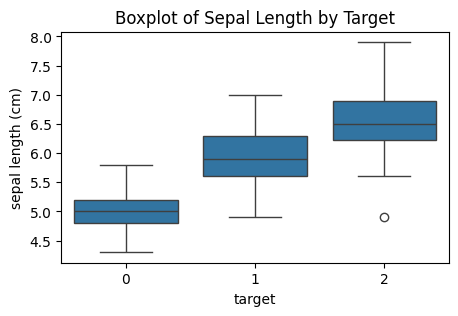

In [9]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="target", y="sepal length (cm)", data=df)
plt.title("Boxplot of Sepal Length by Target")
plt.show()

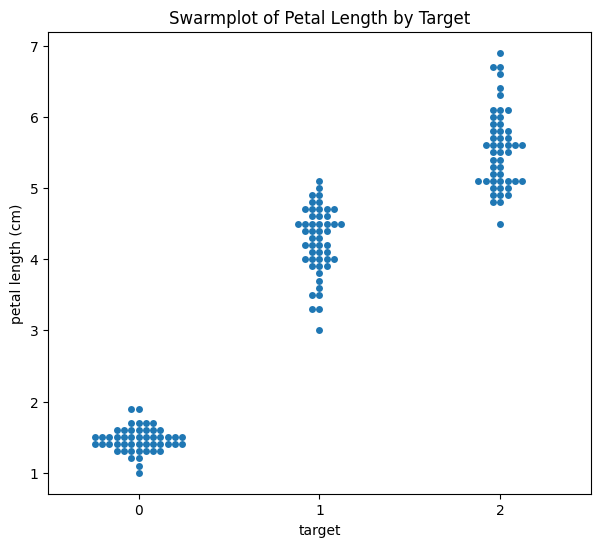

In [10]:
plt.figure(figsize=(7, 6))
sns.swarmplot(x="target", y="petal length (cm)", data=df)
plt.title("Swarmplot of Petal Length by Target")
plt.show()

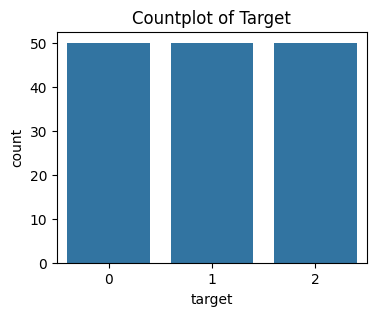

In [11]:
plt.figure(figsize=(4, 3))
sns.countplot(x="target", data=df)
plt.title("Countplot of Target")
plt.show()

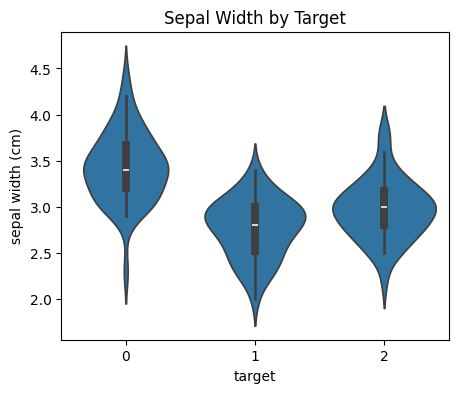

In [12]:
plt.figure(figsize=(5, 4))
sns.violinplot(x="target", y="sepal width (cm)", data=df)
plt.title("Sepal Width by Target")
plt.show()

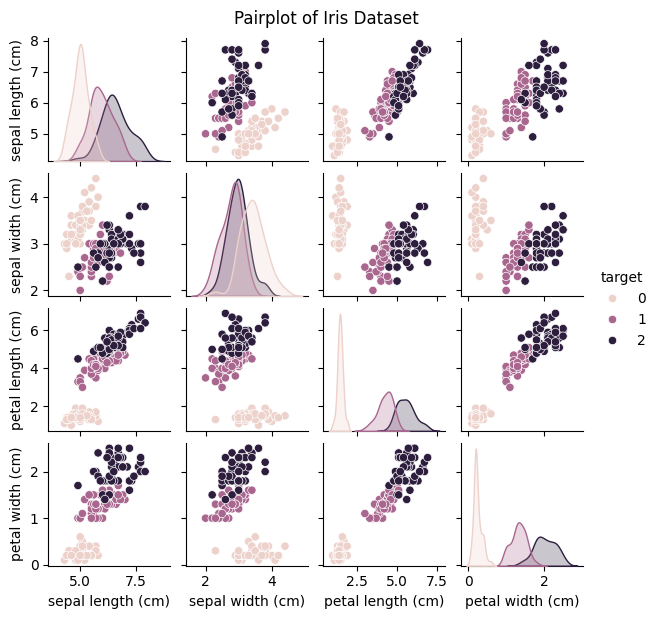

In [13]:
sns.pairplot(df, hue="target", height=1.5)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

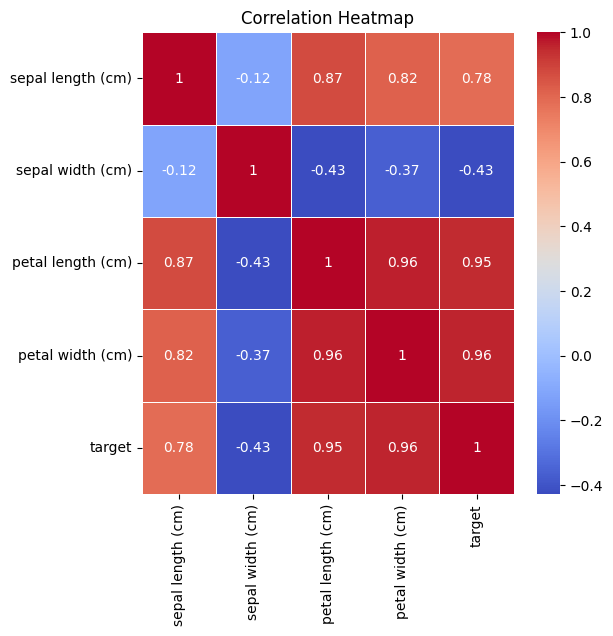

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
x=df.drop('target',axis='columns')
y=df.target

In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(LogisticRegression(solver='sag',max_iter=2000),x,y,cv=3)

array([0.98, 0.96, 0.98])

In [19]:
cross_val_score(SVC(),x,y,cv=3)

array([0.96, 0.98, 0.94])

In [20]:
cross_val_score(DecisionTreeClassifier(),x,y,cv=3)

array([0.98, 0.94, 0.98])

The LogisticRegression has more score and let's visualize the confusion matrix

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
lr=LogisticRegression(solver='sag',max_iter=2000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [23]:
y_pred=lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 1, 2])

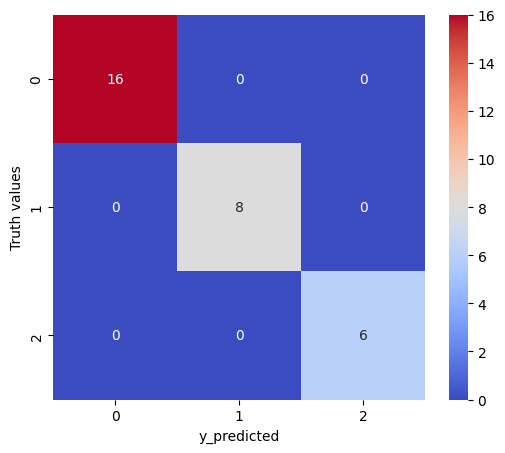

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.xlabel('y_predicted')
plt.ylabel('Truth values')
plt.show()

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00
